<a href="https://colab.research.google.com/github/cepdnaclk/e19-CO544-Online-Shoppers-Purchasing-Intention/blob/main/Code/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/cepdnaclk/e19-CO544-Online-Shoppers-Purchasing-Intention/main/DataSets/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [46]:
X = df.drop(['Revenue'], axis=1) # Features
y = df['Revenue'] # Label
X.shape, y.shape

((12330, 17), (12330,))

In [47]:
# Change bool and object value using label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X_enc = X.copy()
y_enc = y.copy()
for col in X.columns:
    if X[col].dtypes == 'object' or X[col].dtypes == 'bool':
        X_enc[col] = lb.fit_transform(X[col].values)

y_enc = lb.fit_transform(df['Revenue'])
X_enc
y_enc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Now all the columns have numerical values, however we cant use these values. Beacuse for nominal categorical variables there is no numerical sorting relation between the variables (ProductRelated, Operating Systems, Browser, Region,  VisitorType, Month).

In [48]:
# Display unique values after encoding
print("ProductRelated:")
print(X_enc["ProductRelated"].unique())
print("Number of unique values:", X_enc["ProductRelated"].nunique())

print("\nOperatingSystems:")
print(X_enc["OperatingSystems"].unique())
print("Number of unique values:", X_enc["OperatingSystems"].nunique())

print("\nBrowser:")
print(X_enc["Browser"].unique())
print("Number of unique values:", X_enc["Browser"].nunique())

print("\nRegion:")
print(X_enc["Region"].unique())
print("Number of unique values:", X_enc["Region"].nunique())

print("\nVisitorType:")
print(X_enc["VisitorType"].unique())
print("Number of unique values:", X_enc["VisitorType"].nunique())

print("\nMonth:")
print(X_enc["Month"].unique())
print("Number of unique values:", X_enc["Month"].nunique())


ProductRelated:
[  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195  99 362
 179 118 175 148 440 103 178 184 705 134 176 146 189 120 193 222 121 107
 305 199 439 223 230 280 377 310 158 486 153 139 182 221 229 216 170 202
 346 274 240 162 123 211 227 168 161 429 686 167 518 256 255 358 213 191
 282 155 138 246 237 271 171 414 219 262 409 243 241 197 449 143 188 391
 238 152 165 293 174 584 164 311 34

In [21]:
#dummiesOfProductRelated = pd.get_dummies(X_enc.ProductRelated, prefix="ProductRelated", drop_first=True).astype(int)
#dummiesOfOperatingSystems = pd.get_dummies(X_enc.OperatingSystems, prefix="OperatingSystems", drop_first=True).astype(int)
#dummiesOfBrowser = pd.get_dummies(X_enc.Browser, prefix="Browser", drop_first=True).astype(int)
#dummiesOfRegion = pd.get_dummies(X_enc.Region, prefix="Region", drop_first=True).astype(int)
#dummiesOfVisitorType = pd.get_dummies(X_enc.VisitorType, prefix="VisitorType", drop_first=True).astype(int)
#dummiesOfMonth = pd.get_dummies(X_enc.Month, prefix="Month", drop_first=True).astype(int)

In [35]:
#X_enc = X_enc.drop(['ProductRelated', 'OperatingSystems', 'Browser', 'Region', 'VisitorType', 'Month'],axis='columns')

In [23]:
#merged = pd.concat([X_enc, dummiesOfProductRelated, dummiesOfOperatingSystems, dummiesOfBrowser, dummiesOfRegion, dummiesOfVisitorType, dummiesOfMonth], axis = 'columns')
#merged

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,TrafficType,...,VisitorType_2,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
0,0,0.0,0,0.0,0.000000,0.200000,0.200000,0.000000,0.0,1,...,1,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,64.000000,0.000000,0.100000,0.000000,0.0,2,...,1,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,0.000000,0.200000,0.200000,0.000000,0.0,3,...,1,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2.666667,0.050000,0.140000,0.000000,0.0,4,...,1,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,627.500000,0.020000,0.050000,0.000000,0.0,4,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,1783.791667,0.007143,0.029031,12.241717,0.0,1,...,1,1,0,0,0,0,0,0,0,0
12326,0,0.0,0,0.0,465.750000,0.000000,0.021333,0.000000,0.0,8,...,1,0,0,0,0,0,0,1,0,0
12327,0,0.0,0,0.0,184.250000,0.083333,0.086667,0.000000,0.0,13,...,1,0,0,0,0,0,0,1,0,0
12328,4,75.0,0,0.0,346.000000,0.000000,0.021053,0.000000,0.0,11,...,1,0,0,0,0,0,0,1,0,0


In [55]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_enc,y_enc.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1908
Before OverSampling, counts of label '0': 10422 

After OverSampling, the shape of train_X: (20844, 17)
After OverSampling, the shape of train_y: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size =0.3, random_state=42)



In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14590, 11), (14590,), (6254, 11), (6254,))

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.metrics import accuracy_score


# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=100, max_features=5 )
# Fit to training set
gbc.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

# Accuracy on training and test sets
gb_train = accuracy_score(y_train, y_pred_train)
gb_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on training set: ", gb_train)
print("Accuracy on test set: ", gb_test)


Accuracy on training set:  0.9176148046607265
Accuracy on test set:  0.9099776143268308


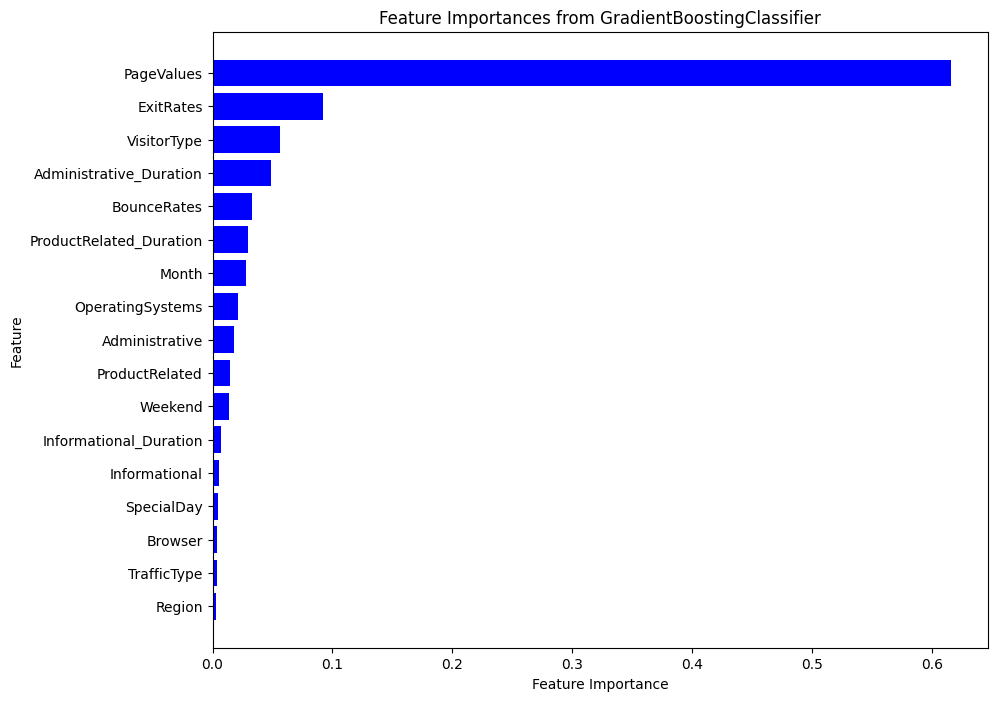

In [58]:
# Get feature importances
feature_importance = gbc.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'feature': X_enc.columns, 'importance': feature_importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['importance'], color='b', align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from GradientBoostingClassifier')
plt.gca().invert_yaxis()
plt.show()

In [61]:
import pickle

with open ('model_gradient_boosting_classifier', 'wb') as f:
  pickle.dump(gbc, f)

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Other metrics
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

class_report_train = classification_report(y_train, y_pred_train)
class_report_test = classification_report(y_test, y_pred_test)

# Print results
print("Accuracy on training data: ", rf_train)
print("Accuracy on testing data: ", rf_test)
print("\nPrecision on training data: ", precision_train)
print("Recall on training data: ", recall_train)
print("F1 Score on training data: ", f1_train)
print("\nPrecision on testing data: ", precision_test)
print("Recall on testing data: ", recall_test)
print("F1 Score on testing data: ", f1_test)
print("\nConfusion Matrix on training data:\n", conf_matrix_train)
print("Confusion Matrix on testing data:\n", conf_matrix_test)
print("\nClassification Report on training data:\n", class_report_train)
print("Classification Report on testing data:\n", class_report_test)


Accuracy on training data:  0.9176148046607265
Accuracy on testing data:  0.9099776143268308

Precision on training data:  0.9177323914669523
Recall on training data:  0.9176148046607265
F1 Score on training data:  0.9176094215936765

Precision on testing data:  0.9100535728819902
Recall on testing data:  0.9099776143268308
F1 Score on testing data:  0.9099725665252238

Confusion Matrix on training data:
 [[6637  662]
 [ 540 6751]]
Confusion Matrix on testing data:
 [[2820  303]
 [ 260 2871]]

Classification Report on training data:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      7299
           1       0.91      0.93      0.92      7291

    accuracy                           0.92     14590
   macro avg       0.92      0.92      0.92     14590
weighted avg       0.92      0.92      0.92     14590

Classification Report on testing data:
               precision    recall  f1-score   support

           0       0.92      0.90     